# 1. Read and display data

Used dataset (already converted dataset into csv): https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

Original dataset: https://yann.lecun.com/exdb/mnist/

In [14]:
import pandas as pd 
import os 

mnist_root_path = ".\data\mnist_csv"


test_data_path = os.path.join(mnist_root_path, "mnist_test.csv")
train_data_path = os.path.join(mnist_root_path, "mnist_train.csv")

test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)

train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_data.shape

(60000, 785)

In [16]:
train_data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
1x1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x4,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [17]:
print("Min value: ", max(train_data.describe().T["max"]),"\nMax value: ", min(train_data.describe().T["max"]))

Min value:  255.0 
Max value:  0.0


There are a total of 785 columns: 
- one label column describing the number which should be displayed 
- 28x28=784 columns with values betweed 0 and 255 to descibe every pixel of the photo 

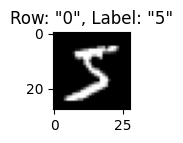

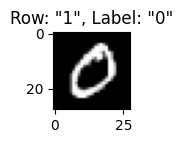

In [18]:
from helper_functions import mnist_csv_plot_number

mnist_csv_plot_number(df=train_data, index=0, count=2, figsize=(1,1))

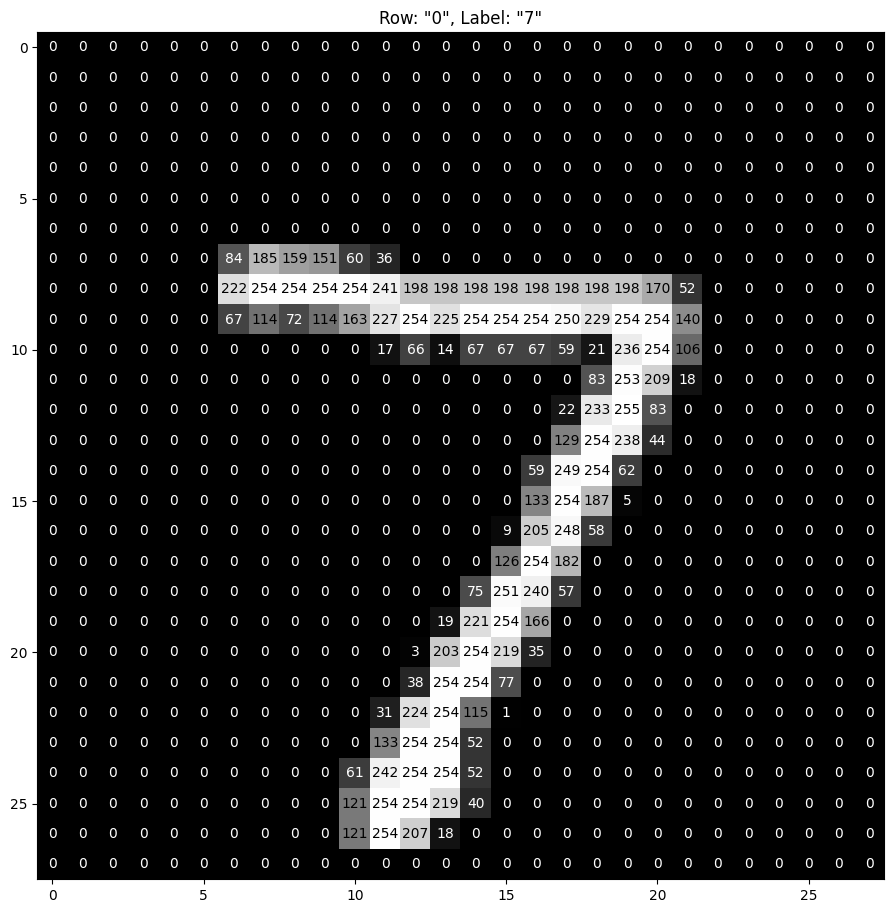

In [19]:
from helper_functions import mnist_csv_plot_number_canvas

mnist_csv_plot_number_canvas(df=test_data)

# 2. Model

In [20]:
from model_functions import MNIST_DF_Dataset
from torch.utils.data import DataLoader

# test dataset
# create customdataset from pytorch
test_dataset = MNIST_DF_Dataset(test_data)
# create test DataLoaders
test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=True)


# train dataset
# create customdataset from pytorch
train_dataset = MNIST_DF_Dataset(train_data)
# create train DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)


# Klassen
classes = ("0","1","2","3","4","5","6","7","8","9")

In [21]:
from model_functions import MNIST_Net

net = MNIST_Net()

In [22]:
import torch.optim as optim
import torch.nn as nn

# Beispiel: Definition des Optimizers und der Loss-Funktion
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [23]:
from model_functions import train

model_directory = r"./nn/"
model_name = "mnist_conv"
epochs = 1 

train(model=net, dataloader=train_dataloader, epochs=epochs, optimizer=optimizer, criterion=criterion, model_directory=model_directory, model_name=model_name)

[1,  2000] loss: 1.629
[1,  4000] loss: 0.385
[1,  6000] loss: 0.236
[1,  8000] loss: 0.191
[1, 10000] loss: 0.170
[1, 12000] loss: 0.155
[1, 14000] loss: 0.140
[1, 16000] loss: 0.119
[1, 18000] loss: 0.105
[1, 20000] loss: 0.111
[1, 22000] loss: 0.103
[1, 24000] loss: 0.100
[1, 26000] loss: 0.082
[1, 28000] loss: 0.078
[1, 30000] loss: 0.084
Finished Training


In [24]:
from model_functions import evaluate_model

# Genauigkeit überprüfen
evaluate_model(net, test_dataloader)

Accuracy of the network on the test images: 97.96%


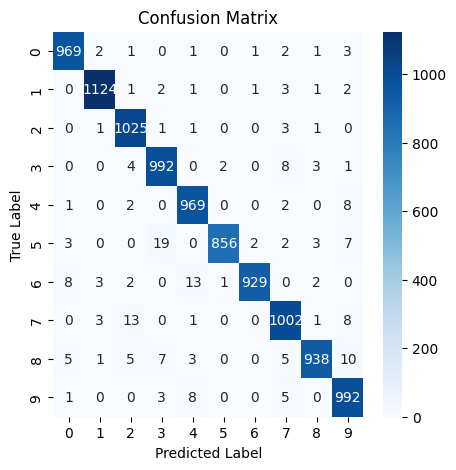

Accuracy:  0.9796
Precision: 0.9798
Recall:    0.9796
F1 Score:  0.9796


In [26]:
from model_functions import evaluate_model_v2

# Genauigkeit überprüfen
accuracy, precision, recall, f1 = evaluate_model_v2(net, test_dataloader)

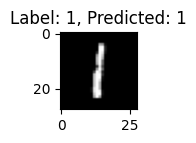

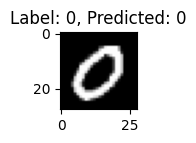

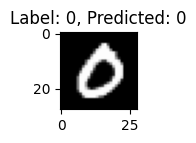

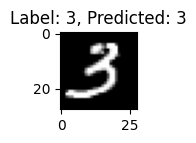

In [25]:
from helper_functions import visualize_predictions

# Modellvorhersagen visualisieren
visualize_predictions(net, test_dataloader, num_images=4, figsize=(1,1))

# 3. Load old model from .pt file 

In [27]:
import pandas as pd 
import os 

mnist_root_path = ".\data\mnist_csv"


test_data_path = os.path.join(mnist_root_path, "mnist_test.csv")
train_data_path = os.path.join(mnist_root_path, "mnist_train.csv")

test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)

In [28]:
from model_functions import MNIST_DF_Dataset
from torch.utils.data import DataLoader

# Erstellen des Dataset-Objekts
test_dataset = MNIST_DF_Dataset(train_data)

# Erstellen des DataLoaders
test_dataloader = DataLoader(test_dataset, batch_size=50, shuffle=True)

# Erstellen des Dataset-Objekts
train_dataset = MNIST_DF_Dataset(test_data)

# Erstellen des DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Klassen
classes = ("0","1","2","3","4","5","6","7","8","9")

In [32]:
from model_functions import MNIST_Net
import torch 
import torch.optim as optim

# load old model state 
model_path = r"nn\mnist_conv_time-23-55-05\epoch_10.pt"

# define model and optimizer (same as the old ones)
model = MNIST_Net()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# load checkpoint
checkpoint = torch.load(model_path)

# update model and optimizer from checkpoint data 
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# model evaluation 
model.eval()

MNIST_Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [33]:
from model_functions import evaluate_model

# evaluate model (v1)
evaluate_model(model, test_dataloader)

Accuracy of the network on the test images: 99.58%


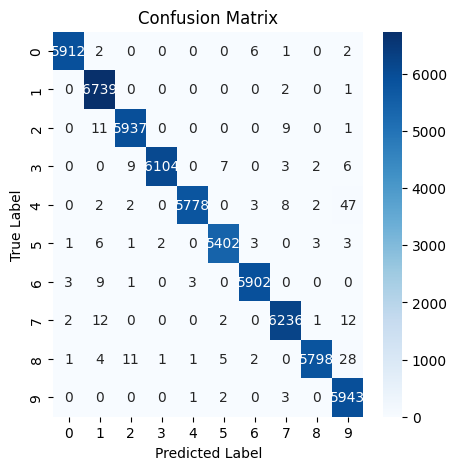

Accuracy:  0.9959
Precision: 0.9959
Recall:    0.9959
F1 Score:  0.9959


In [34]:
from model_functions import evaluate_model_v2

# evaluate model (v2)
accuracy, precision, recall, f1 = evaluate_model_v2(model, test_dataloader)

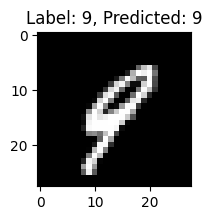

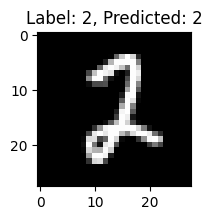

In [35]:
from helper_functions import visualize_predictions

# Modellvorhersagen visualisieren
visualize_predictions(model, test_dataloader, num_images=2, figsize=(2,2))